In [ ]:
!pip install numpy as np
!pip install pandas as pd
!pip install matplotlib
!pip install scipy
!pip install seaborn
!pip install cvxpy

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [20]:
import numpy as np
import pandas as pd
import scipy
import pandas_datareader as web
import seaborn as sns
import yfinance as yf
import cvxpy as cvx

# Plotting
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab

#Statistical calculation
from scipy.stats import norm
from scipy.optimize import minimize, Bounds

byddata = pd.read_csv('BYD.csv')
cocodata = pd.read_csv('COCO.csv')
elfdata = pd.read_csv('ELF.csv')
kodata = pd.read_csv('KO.csv')
sdata = pd.read_csv('S.csv')
spxdata = pd.read_csv('SPX.csv')

byddata.rename(columns={'Close': 'bydprice'}, inplace=True)
cocodata.rename(columns={'Close': 'cocoprice'}, inplace=True)
elfdata.rename(columns={'Close': 'elfprice'}, inplace=True)
kodata.rename(columns={'Close': 'koprice'}, inplace=True)
sdata.rename(columns={'Close': 'sprice'}, inplace=True)
spxdata.rename(columns={'Close': 'spxprice'}, inplace=True)

byd = byddata['bydprice']
coco = cocodata['cocoprice']
elf = elfdata['elfprice']
ko = kodata['koprice']
s = sdata['sprice']
spx = spxdata['spxprice']

In [27]:
returns = pd.concat([byd, coco, elf, ko, s], axis=1)
returns = returns.pct_change().dropna()
returns = returns.rename_axis("ID")

data = pd.concat([returns, spx], axis=1)
data = data.rename_axis('ID')
print(returns)
a = data.cov() #covariance matrix



betas = a["spxprice"].drop("spxprice") / a.loc["spxprice", "spxprice"]



covmat = data.drop(columns=["spxprice"]).cov()  # we need to drop s&p500 figures from the vcv matrix
num_weights = covmat.shape[1]  # number of constituents
x = cvx.Variable(num_weights)  # the variable that is allowed to change in the optimization function
port_var = cvx.QuadForm(x, covmat)  # portfolio variance
objective = cvx.Minimize(port_var)  # the objective function to be minimized

# Constraints on concentration
lower_bound = -1.0
upper_bound = 1.0

constraints = [x >= lower_bound,
               x <= upper_bound,
               sum(x) == 1,
               x.T @ betas == 0.0]

# solving the objective
problem = cvx.Problem(objective, constraints)
problem.solve()

x = x.value
print(x)

     bydprice  cocoprice  elfprice   koprice    sprice
ID                                                    
1   -0.022466  -0.027972 -0.001858 -0.002307 -0.030748
2    0.006842  -0.016351  0.021537  0.005241  0.003244
3   -0.026834   0.012633 -0.013274 -0.000767 -0.052102
4   -0.014145   0.017728 -0.010815 -0.014884 -0.006444
5    0.008899  -0.012258 -0.000800  0.001090  0.059901
..        ...        ...       ...       ...       ...
247  0.007139   0.031356  0.017257 -0.002293 -0.009253
248 -0.006054  -0.029304 -0.005705  0.004104  0.008672
249  0.002229   0.042641  0.012834 -0.004741  0.002646
250 -0.011266  -0.010858 -0.013640 -0.006735 -0.025726
251 -0.010495  -0.024515 -0.021310  0.000165 -0.004062

[251 rows x 5 columns]
[ 0.0835811  -0.05704106  0.01333857  0.94769386  0.01242753]


Optimizing weights at time  12
Optimizing weights at time  13
Optimizing weights at time  14
Optimizing weights at time  15
Optimizing weights at time  16
Optimizing weights at time  17
Optimizing weights at time  18
Optimizing weights at time  19
Optimizing weights at time  20
Optimizing weights at time  21
Optimizing weights at time  22
Optimizing weights at time  23
Optimizing weights at time  24
Optimizing weights at time  25
Optimizing weights at time  26
Optimizing weights at time  27
Optimizing weights at time  28
Optimizing weights at time  29
Optimizing weights at time  30
Optimizing weights at time  31
Optimizing weights at time  32
Optimizing weights at time  33
Optimizing weights at time  34
Optimizing weights at time  35
Optimizing weights at time  36
Optimizing weights at time  37
Optimizing weights at time  38
Optimizing weights at time  39
Optimizing weights at time  40
Optimizing weights at time  41
Optimizing weights at time  42
Optimizing weights at time  43
Optimizi

/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Optimizing weights at time  66
Optimizing weights at time  67
Optimizing weights at time  68
Optimizing weights at time  69
Optimizing weights at time  70
Optimizing weights at time  71
Optimizing weights at time  72
Optimizing weights at time  73
Optimizing weights at time  74
Optimizing weights at time  75
Optimizing weights at time  76
Optimizing weights at time  77
Optimizing weights at time  78
Optimizing weights at time  79
Optimizing weights at time  80
Optimizing weights at time  81
Optimizing weights at time  82
Optimizing weights at time  83
Optimizing weights at time  84
Optimizing weights at time  85
Optimizing weights at time  86
Optimizing weights at time  87
Optimizing weights at time  88
Optimizing weights at time  89
Optimizing weights at time  90
Optimizing weights at time  91
Optimizing weights at time  92
Optimizing weights at time  93
Optimizing weights at time  94
Optimizing weights at time  95
Optimizing weights at time  96
Optimizing weights at time  97
Optimizi

/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Optimizing weights at time  119
Optimizing weights at time  120
Optimizing weights at time  121
Optimizing weights at time  122
Optimizing weights at time  123
Optimizing weights at time  124
Optimizing weights at time  125
Optimizing weights at time  126
Optimizing weights at time  127
Optimizing weights at time  128
Optimizing weights at time  129
Optimizing weights at time  130
Optimizing weights at time  131
Optimizing weights at time  132
Optimizing weights at time  133
Optimizing weights at time  134
Optimizing weights at time  135
Optimizing weights at time  136
Optimizing weights at time  137
Optimizing weights at time  138
Optimizing weights at time  139
Optimizing weights at time  140
Optimizing weights at time  141
Optimizing weights at time  142
Optimizing weights at time  143
Optimizing weights at time  144
Optimizing weights at time  145
Optimizing weights at time  146
Optimizing weights at time  147
Optimizing weights at time  148
Optimizing weights at time  149
Optimizi

Text(0.5, 1.0, 'Mkt Neutral Portfolio Rolling Beta to Market')

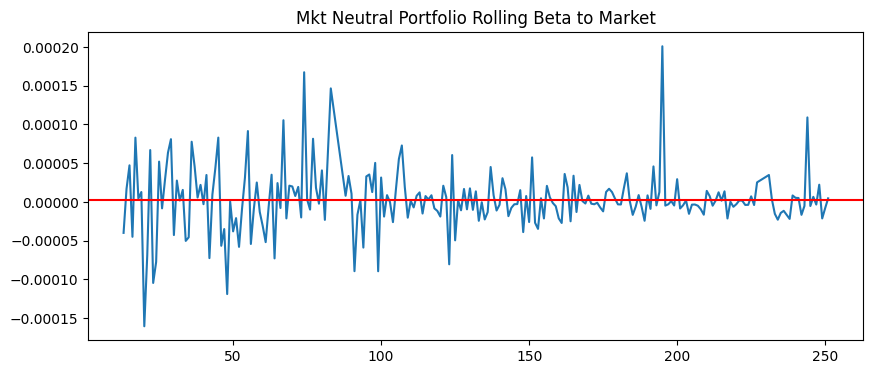

In [28]:
w = pd.Series(x, index=covmat.columns)



def get_mkt_neutral_weights(covmat, mkt_betas, lower_bound=-1.0, upper_bound=1.0):
    num_weights = covmat.shape[1]
    x = cvx.Variable(num_weights)
    port_var = cvx.QuadForm(x, covmat)
    objective = cvx.Minimize(port_var)

    constraints = [x >= lower_bound,
                   x <= upper_bound,
                   sum(x) == 1,
                   x.T @ mkt_betas == 0.0]

    # solving the objective
    problem = cvx.Problem(objective, constraints)
    problem.solve()

    x = x.value

    return x
get_mkt_neutral_weights(covmat, betas)

roll_covmat = data.rolling(window=12).cov().dropna()

# Rolling optimization
date_list = set(roll_covmat.index.get_level_values("ID"))
#print(pd.Index(date_list).sort_values())
weights = pd.DataFrame(index=pd.Index(date_list).sort_values(), columns=returns.columns)
betas = pd.DataFrame(index=pd.Index(date_list).sort_values(), columns=returns.columns)
#print(weights)
for date in date_list:
  print("Optimizing weights at time ", date)
  tmp_full_cov = roll_covmat.loc[date]
  tmp_cov = tmp_full_cov.drop("spxprice").drop(columns=["spxprice"])
  tmp_betas = tmp_full_cov["spxprice"].drop("spxprice") / tmp_full_cov.loc["spxprice", "spxprice"]


  weights.loc[date, :] = get_mkt_neutral_weights(tmp_cov, tmp_betas)
  betas.loc[date, :] = tmp_betas
#print(x)

portfolio_beta = (weights.shift(1) * betas).dropna().sum(axis=1)
portfolio_beta.head()

portfolio_beta.plot(figsize=(10, 4))
plt.axhline(portfolio_beta.mean(), color="red")
plt.title("Mkt Neutral Portfolio Rolling Beta to Market")

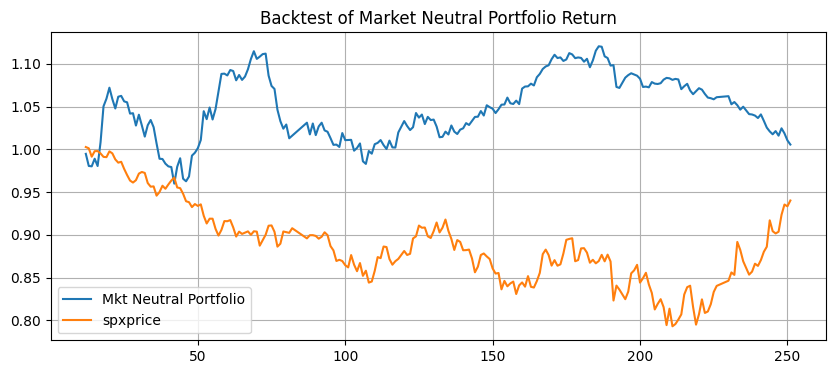

In [ ]:
portfolio_ret = (weights * returns).dropna().sum(axis=1)
(1 + portfolio_ret).cumprod().plot(figsize=(10, 4), label="Mkt Neutral Portfolio")
(1 + data.pct_change().loc[portfolio_ret.index].spxprice).cumprod().plot()
plt.grid()
plt.legend()
plt.title("Backtest of Market Neutral Portfolio Return")
plt.show()